In [1]:
import GEOparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
gse = GEOparse.get_GEO(geo="GSE22552")


20-Apr-2022 23:09:54 DEBUG utils - Directory ./ already exists. Skipping.
20-Apr-2022 23:09:54 INFO GEOparse - File already exist: using local version.
20-Apr-2022 23:09:54 INFO GEOparse - Parsing ./GSE22552_family.soft.gz: 
20-Apr-2022 23:09:54 DEBUG GEOparse - DATABASE: GeoMiame
20-Apr-2022 23:09:54 DEBUG GEOparse - SERIES: GSE22552
20-Apr-2022 23:09:54 DEBUG GEOparse - PLATFORM: GPL570
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
20-Apr-2022 23:09:55 DEBUG GEOparse - SAMPLE: GSM559689
20-Apr-2022 23:09:55 DEBUG GEOparse - SAMPLE: GSM559690
20-Apr-2022 23:09:56 DEBUG GEOparse - SAMPLE: GSM559691
20-Apr-2022 23:09:56 DEBUG GEOparse - SAMPLE: GSM559692
20-Apr-2022 23:09:56 DEBUG GEOparse - SAMPLE: GSM559693
20-Apr-2022 23:09:56 DEBUG GEOparse - SAMPLE: GSM559694
20-Apr

In [3]:
dataframes = []
for key, val in gse.gsms.items():
  table = val.table.set_index("ID_REF").rename(columns={"VALUE": key})
  dataframes.append(table)
  
data = pd.concat(dataframes, axis=1)

genes_comprehensible_data = gse.gpls["GPL570"].table.rename(columns={"ID": "ID_REF"}).set_index('ID_REF').loc[: , ('Gene Symbol', 'ENTREZ_GENE_ID')]

merged_dataframes = pd.merge(left=genes_comprehensible_data, right=data, left_index=True, right_index=True)

def remove_trailing_slashes(col):
  arr = np.array(col)
  return [str(gene).split('/')[0] for gene in arr]
  
refined_gpl = genes_comprehensible_data[['Gene Symbol', 'ENTREZ_GENE_ID']].apply(remove_trailing_slashes)

refined_merged_dataframe = pd.merge(left=refined_gpl, right=data, left_index=True, right_index=True).reset_index().set_index(['ID_REF','Gene Symbol', 'ENTREZ_GENE_ID'])

In [4]:
# Task 1:
phenotypes = gse.phenotype_data
removed_data_sets = list(phenotypes[phenotypes['title'].str.contains('Uns_')].index.values)
dataset_pre_processed = refined_merged_dataframe.drop(removed_data_sets, axis=1)
dataset_pre_processed

,,,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
ID_REF,Gene Symbol,ENTREZ_GENE_ID,,,,,,,,,,,,
1007_s_at,DDR1,780,4.946777,4.728418,4.738051,4.762729,4.549447,4.835533,4.709747,4.715527,5.049346,5.631210,5.379607,5.397816
1053_at,RFC2,5982,8.207308,8.695805,8.383330,8.049325,8.751171,8.381886,7.992828,7.998183,7.401185,5.444929,5.151547,5.207811
117_at,HSPA6,3310,6.311369,5.249919,5.953954,5.532214,5.746198,6.212243,6.870430,7.032106,7.295045,7.667298,7.784505,8.278446
121_at,PAX8,7849,7.159099,7.062484,7.329124,7.294014,7.006325,7.283475,7.156998,7.201767,7.397696,7.543862,7.869274,7.897521
1255_g_at,GUCA1A,2978,3.821799,3.603829,3.691750,3.791226,3.654054,3.681459,4.896534,4.008463,4.508532,4.946233,3.765626,4.096830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,nan,nan,5.624310,5.326154,5.588887,4.996499,5.471355,5.893110,5.743403,5.517842,6.319863,6.153024,6.339153,6.779153
AFFX-ThrX-M_at,nan,nan,6.589780,7.078883,7.219033,6.143109,6.954125,7.585613,7.354877,7.337199,8.222956,7.808429,8.113187,8.420713
AFFX-TrpnX-3_at,nan,nan,3.267483,3.231707,3.019570,3.382046,3.186596,3.207259,3.246196,3.197220,3.210587,3.385809,3.295025,3.326088


In [5]:
# task 2:
dataset_pre_processed.describe()

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
count,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000
mean,5.631351,5.645538,5.647177,5.643353,5.650497,5.646240,5.647751,5.648663,5.642804,5.641746,5.632729,5.627669
std,2.008718,2.151832,2.135346,2.050417,2.132387,2.122161,2.103597,2.102086,2.093149,1.956583,1.967552,1.983168
min,2.552829,2.592396,2.557528,2.570300,2.590768,2.624404,2.589117,2.613913,2.625990,2.648773,2.624857,2.552459
25%,4.068560,3.935353,3.958457,4.037548,3.958517,3.972916,3.986983,3.989839,4.001895,4.130462,4.149201,4.119190
50%,5.234648,5.099071,5.140122,5.176868,5.138922,5.147776,5.166742,5.164457,5.171306,5.283507,5.255295,5.253193
75%,6.701256,6.920745,6.851461,6.774580,6.859045,6.843637,6.819665,6.812792,6.800105,6.644484,6.557022,6.596745
max,14.290997,14.424771,14.416912,14.270190,14.423644,14.405221,14.518687,14.520131,14.548121,14.698327,14.614120,14.627485


In [6]:
# task 3:
dataset_pre_processed.isna().any().any()

False

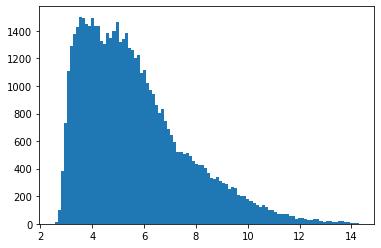

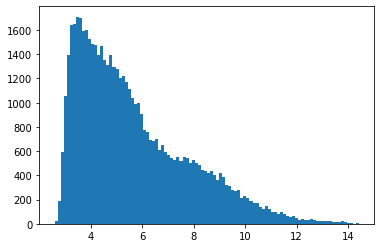

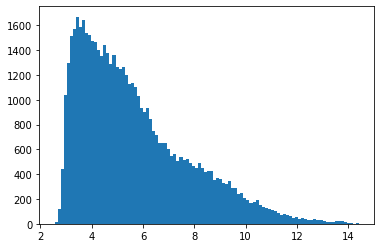

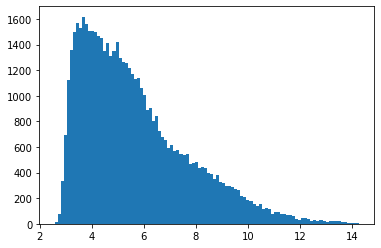

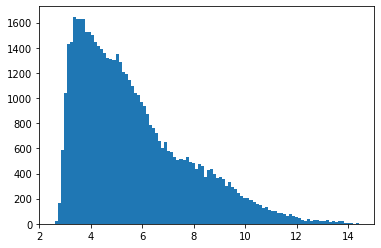

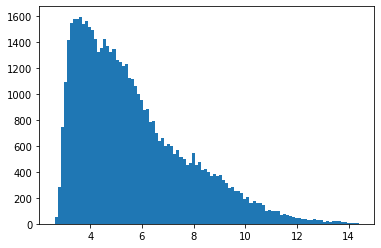

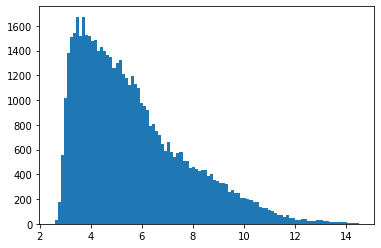

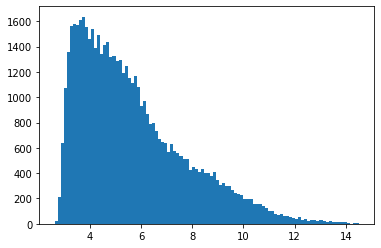

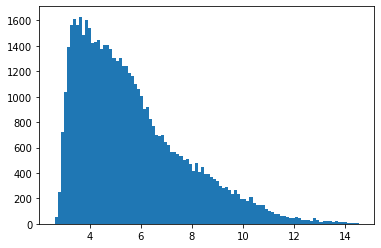

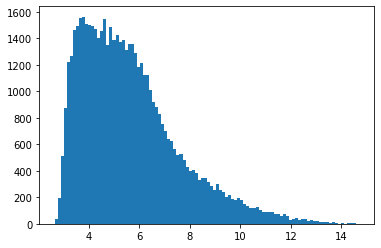

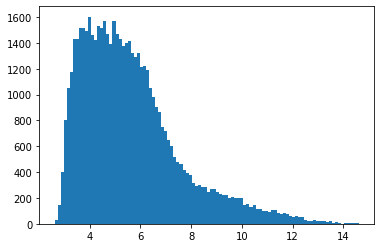

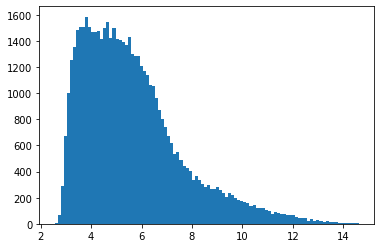

In [7]:
# task 4:
for col in dataset_pre_processed.columns:
  plt.hist(x = dataset_pre_processed[col], bins = 100)
  plt.xlabel('')
  plt.show()

In [8]:
skewness_and_kurtosis = { col: {'skewness': dataset_pre_processed[col].skew(), 
                                'kurtosis': dataset_pre_processed[col].kurtosis()} 
                         for col in dataset_pre_processed.columns
                        }
  

In [9]:
pd.DataFrame(skewness_and_kurtosis)

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
skewness,1.013503,0.977561,0.999848,1.009762,0.994592,1.004559,0.995677,1.007292,1.020091,1.063159,1.169817,1.132653
kurtosis,0.816133,0.418433,0.554537,0.670672,0.531851,0.596929,0.587607,0.615179,0.695862,1.059666,1.398161,1.277798


From the skewness and kurtosis values of each dataset, it is apparent that the distribution of the data is almost the same with some minor differences between each of the datasets. This means that the mean is not changing significantly, which notes that gene expression is stable along the erythrocyte maturation process. And because the value is positive for all sets, the distribution is left-skewed for all datasets. However, the kurtosis varies significantly and we can clearly see that the distribution is sharper during earlier stages of maturation. 

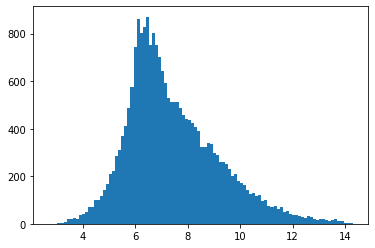

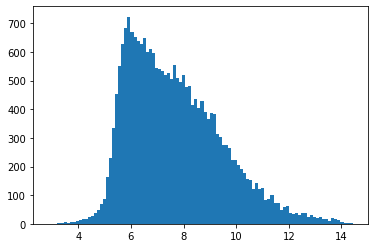

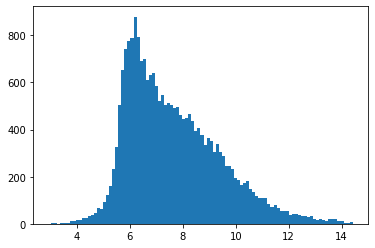

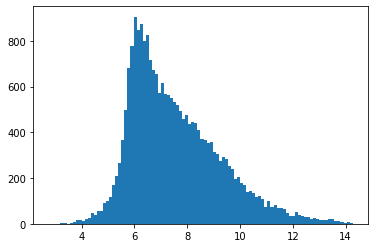

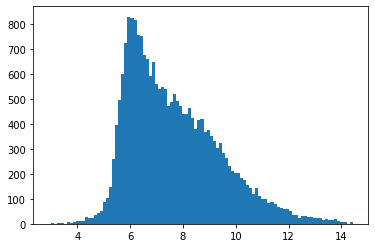

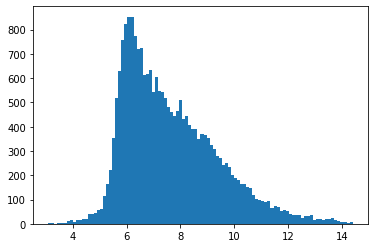

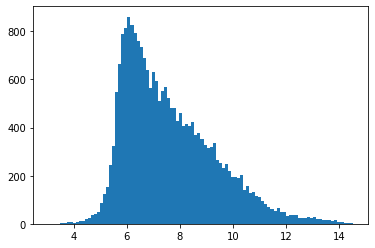

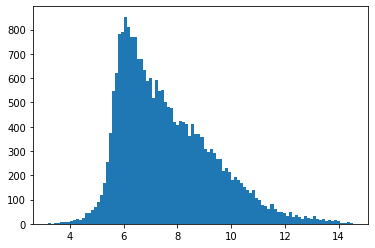

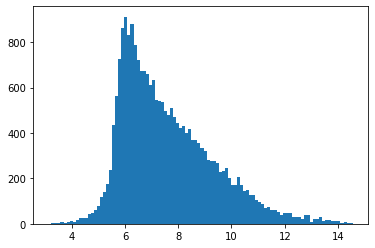

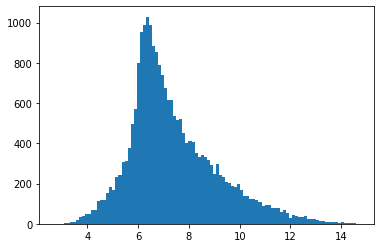

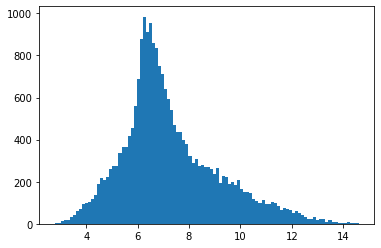

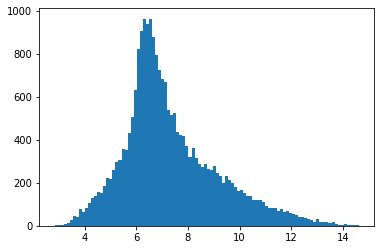

In [28]:
# task 5:
# delete each row with values less than 6 in 10 or more columns
dataset_pre_processed = dataset_pre_processed[dataset_pre_processed[dataset_pre_processed < 6].count(axis=1) < 10]

# plot a histogram for each column
for col in dataset_pre_processed.columns:
  plt.hist(x = dataset_pre_processed[col], bins = 100)
  plt.xlabel('')
  plt.show()

In [29]:
# Calculate data statistics for the new dataset
dataset_pre_processed.describe()

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
count,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000,22888.000000
mean,7.427279,7.669541,7.650221,7.550245,7.656153,7.643832,7.621696,7.614592,7.598402,7.367665,7.266349,7.317293
std,1.746560,1.764297,1.760375,1.706156,1.748826,1.739694,1.723180,1.736977,1.732495,1.733324,1.884421,1.842895
min,2.681277,2.861522,2.915748,2.734791,2.900518,3.090335,3.043126,3.199142,3.122728,2.701759,2.766366,2.826498
25%,6.203458,6.259329,6.260463,6.249882,6.265089,6.270470,6.260103,6.252756,6.253730,6.209733,6.093269,6.142186
50%,7.062255,7.397597,7.304621,7.195034,7.314202,7.280949,7.253982,7.248116,7.212076,6.969626,6.853884,6.898365
75%,8.439444,8.787769,8.738306,8.577970,8.749906,8.713083,8.684816,8.693445,8.633331,8.302457,8.263561,8.294555
max,14.290997,14.424771,14.416912,14.270190,14.423644,14.405221,14.518687,14.520131,14.548121,14.698327,14.614120,14.627485


Here after we deleted values less than 6.0 from all the datasets. We notice that more than 35000 of the genes of each dataset is missing. This implies that most of the values was less than 6. The new mean vlaue increased so it is now centered around 8. 

We conclude that 65% of the genes during cell maturation has lower gene expression value than the other 35% of the genes

In [30]:
# task 6:
df_wiht_new_titles = dataset_pre_processed.rename(
  columns={
    old: gse.gsms[old].metadata["title"][0].split('-')[0] 
    for old in gse.gsms.keys()
  })


In [31]:
summarized_data_frame = df_wiht_new_titles.groupby(df_wiht_new_titles.columns, axis=1).mean()
summarized_data_frame

,,,CFU,Int,Late,Pro
ID_REF,Gene Symbol,ENTREZ_GENE_ID,,,,
1053_at,RFC2,5982,8.428814,7.797399,5.268096,8.394127
117_at,HSPA6,3310,5.838414,7.065860,7.910083,5.830218
121_at,PAX8,7849,7.183569,7.252154,7.770219,7.194605
1294_at,MIR5193,7318,7.133072,7.409423,6.497654,7.062021
1316_at,THRA,7067,6.677613,7.086486,8.047467,6.581211
...,...,...,...,...,...,...
AFFX-r2-P1-cre-3_at,nan,nan,13.110768,13.299282,13.267779,13.086157
AFFX-r2-P1-cre-5_at,nan,nan,13.181870,13.327134,13.316122,13.141793
AFFX-ThrX-3_at,nan,nan,9.058028,9.545793,10.357162,8.886965


I used the mean to summarize each dataset because it is the most valuable summary of all statistics and it gives us a better view of what the overall gene expression would be for all samples in the same stage of maturation. 

Also, we assume that all samples of each stage have been taken in the same conditions, so when we have eliminated the environmental effect and the patch effect, the mean is the best statistical summary to use for summarizing a group of values. 